# Revisão de conteúdos de Megadados

## Aula 14, 15 e 16

### Dependências funcionais

𝑋 → 𝑌 ⇔ duas linhas da tabela que concordam em 𝑋 deverão concordar em Y.

Nesse caso, lê-se: X determina funcionalmente Y ou Y é funcionalmente dependente de X.

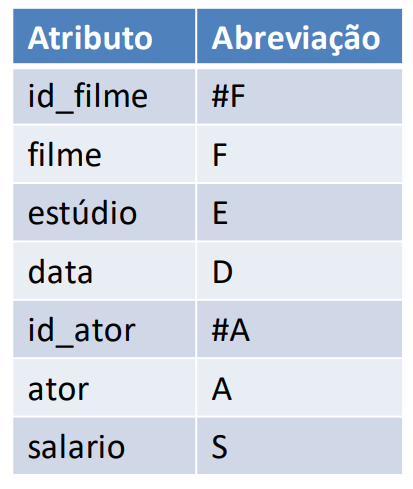

Nesse exemplo, existem as seguintes dependências funcionais:

- #F → F [id_filme determina funcionalmente o filme]
- #A → A [id_ator determina funcionalmente o ator]
- #F → F, E, D [id_filme determina funcionalmente o filme, estúdio e data] - pense que os ids de filmes são únicos daquele filme em específico.
- F, E, D → #F.
- #A, #F → S [id_ator e id_filme determinam funcionalmente o salário] 



As dependências funcionais podem derivar dessas através da aplicação de regras. Dentre elas temos:
    
- Reflexão : Se B está contido em  A (A contém B), então A determina funcionalmente B. (trivial entra aqui também: X → X)
- Aumento : Se A determina funcionalmente B, então AC → BC.
- Transitividade : Se A → B e B → C, então A → C.





### Ideia de fecho

Para encontrar mais dependências podemos aplicar a ideia do fecho. Para cada regra, verifica se o lado esquerdo já está em Z+ e se o lado direito ainda não está, convida.

Exemplo:

Suponha que tenhamos uma relação 𝑅 (𝐴, 𝐵, 𝐶, 𝐷, 𝐸, 𝐹) e as seguintes dependências funcionais:

𝑆 = 𝐴 → 𝐵𝐶, 𝐸 → 𝐶𝐹, 𝐵 → 𝐸, 𝐶𝐷 → 𝐸𝐹

(abreviamos 𝐴 no lugar de {𝐴} , 𝐵𝐶 no lugar de {𝐵, 𝐶} , etc.)

Calcule o fecho 𝑍+ de 𝑍 = {𝐴, 𝐵}


Começamos:

1 loop
- A já está no fecho? Sim. A determina BC. BC está no fecho? B sim, mas C então. Então convida o C. Z+ = {A, B, C}
- E já está no fecho? Não. Vai para o próximo.
- B já está no fecho? Sim. E E? Não, então convida ele. Z+ = {A, B, C, E}
- CD já está no fecho? Não. Volta tudo de novo no loop.

2 loop
{A, B, C, E}
- A já está no fecho? Sim. E BC? Sim.
- E já está? Sim. CF? C já, mas F não. Z+ = {A, B, C, E. F}
- B já está? Sim. E E? Sim.
- CD já está? Não.

FIM

Resposta = {A, B, C, E, F}

Outro exemplo:

𝑆 = #F → F, #F → E, #F → D, #A → A, #F#A → S

Z = {#F}

Z+ = {#F, F, E, D}. Porque #A não entra. Porque o conjunto #F#A está no fecho? Não, só o #F, então não importa!!!

### Chaves

Dentre as chaves temos:

- Superchave: Superchave é aquela que por meio dela todo o grupo faz parte do fecho, ou seja, é um conjunto de atributos K caso o fecho de K (K+) reflete o conjunto completo de atributos da relação.

- Chave candidata: é uma superchave irredutível, ou seja, se eu remover um atributo dela, ela deixa de ser uma superchave. 

- Chave primária: é aquela chave candidata escolhida para ser o identificador da relação (PK).


### Formas normais

Regras que ajudam a diminuir a redundância e aumentar a integridade no projeto de um banco de dados.

**Normalização**: processo de rearranjar o banco de dados para que obedeça às várias formas normais. Por sua vez, **denormalização** é o processo contrário, de regredir o projeto do banco de dados para formas normais menores 

Dentre as formas normais temos:

- 1NF: uma entidade está na primeira forma normal quando cada tupla tem apenas um valor por atributo, ou seja, **quando é formado por colunas com valores simples.**


- 2NF: uma entidade está na segunda forma normal quando obedece À 1NF e todos os seus atributos não chave dependem funcionalmente da chave primária. Isto é, **não tem dependência parcial**. **Atenção:** isso pode valer mesmo que indiretamente, por exemplo:  AB→C, C→ D, D→ A, sendo AB a PK. Nesse caso, ainda que D seja determinado por C, C é determinado por AB, logo podemos dizer que D é determinado por AB e não há dependência parcial. 


- 3NF: uma tabela está na 3NF quando estiver na 2NF e se todos os atributos que não pertencem à chave primária não dependerem funcionalmente de outro atributo que não a chave. Ou seha: **não tem dependência transitiva**.


- BCNF: Um problema surge quando temos relações em que aparecem dependencias funcionais nas quais o lado esquerdo (determinante) não é parte de uma chave candidata mas o lado direito é. Exemplo: 

    Chaves candidatas: PF ou PG Exemplo: G (determinante que não faz parte da primária)→F(faz parte da primária) ; PF → G;
    
    Ou seja, só estará no formato Boyce Codd se e somente se cada deteminante é uma chave candidata - sem ela, a PK deixa de ser super chave. Nesse caso, gerente não é chave candidata e é determinante de F.
    
    Solução: 
     - GerenteFilial (G [PK], F) : G → F
     - ProjetoGerente (P [PK], G [PK]) : PG → PG
     
     
| Gerente|Filial| Projeto |
|----------------|--------------|----------------------|
|Juca            | SP | Árvores|
| Juca        | Qatar    | Árvores|

     
     

### Anomalias

- Atualização: quando a atualização da tabela pode gerar inconsistências em função da redundância de informação.
- Inserção: quando a inserção de dados não pode ser realizada sempre, pelo risco de deixar a base inconsistente.
- Remoção: quando a remoção de linhas da tabela acaba removendo informação totalmente não-relacionada.

Exemplos juntamente com as formas normais. 

**1NF**

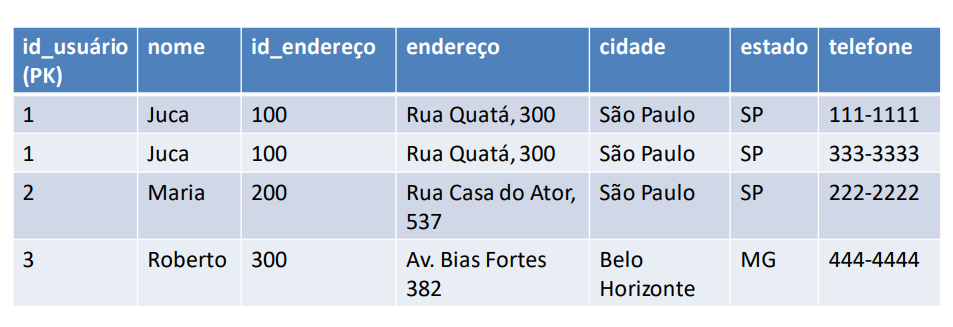


Nesse caso, o endereço possui cidade, IF, rua e número - praticamente uma "struct" de elementos. Por sua vez o telefone possui uma lista. 

A solução seria quebrar os valores em múltiplas linhas e em outras colunas. Lista - outras linhas. Struct - colunas. **Transformar em 1NF**.

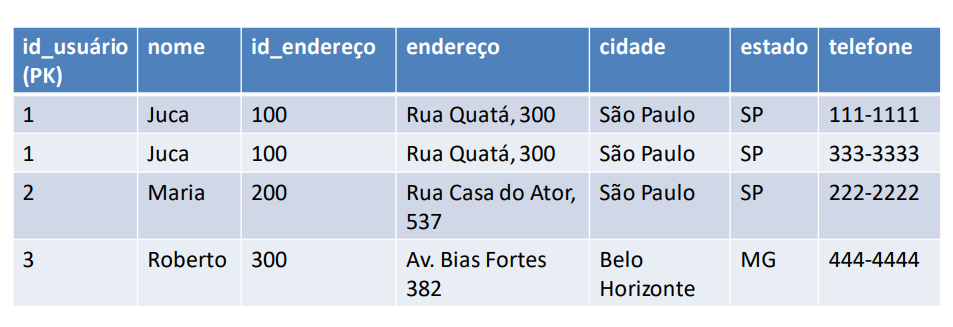


Ainda sim temos anomalias. Se atualizássemos o endereço do Juca em uma linha sem mudar a outra - inconsistência. Ou ainda, como inserir novas cidades sem ter ninguém morando nela? E se removermos uma pessoa (Roberto), a cidade dela vai sumir da base de dados.

**2NF**

Antes não estava em 2NF, mas separando em diferentes tabelas e fazendo ter dependência somente da PK fez **transformar em 2NF**

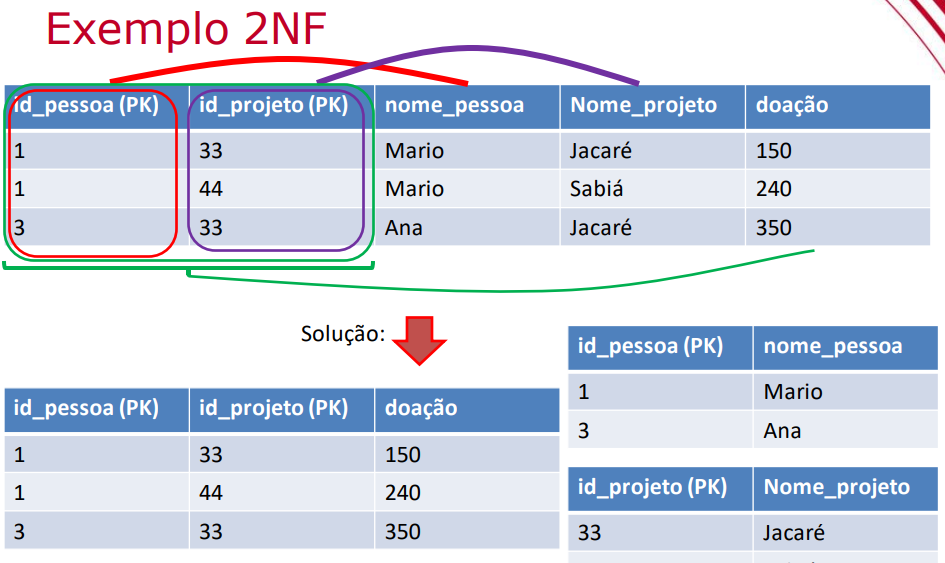

**3NF**

Não é 3NF:

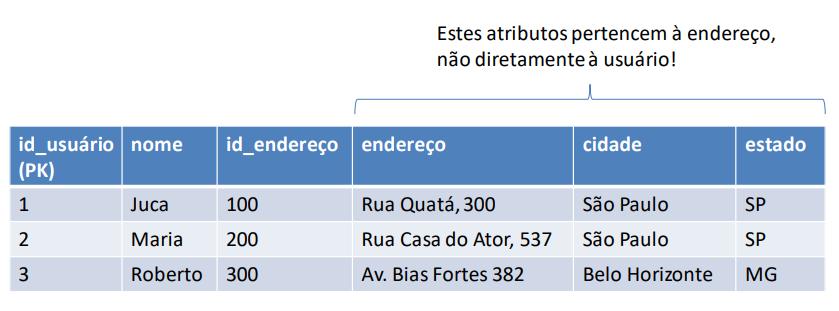


**Transformação para 3NF**:

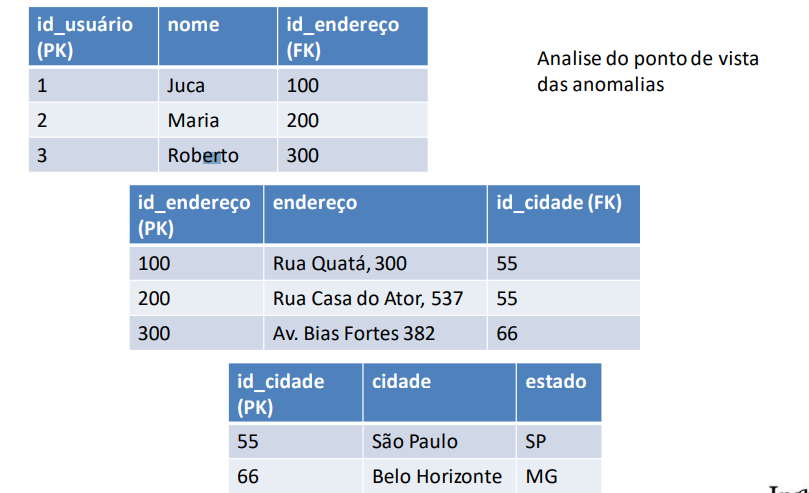

**BCNF:**
    
- Solução: normalmente separa cada tabela com uma PK diferente.

### Resumo:


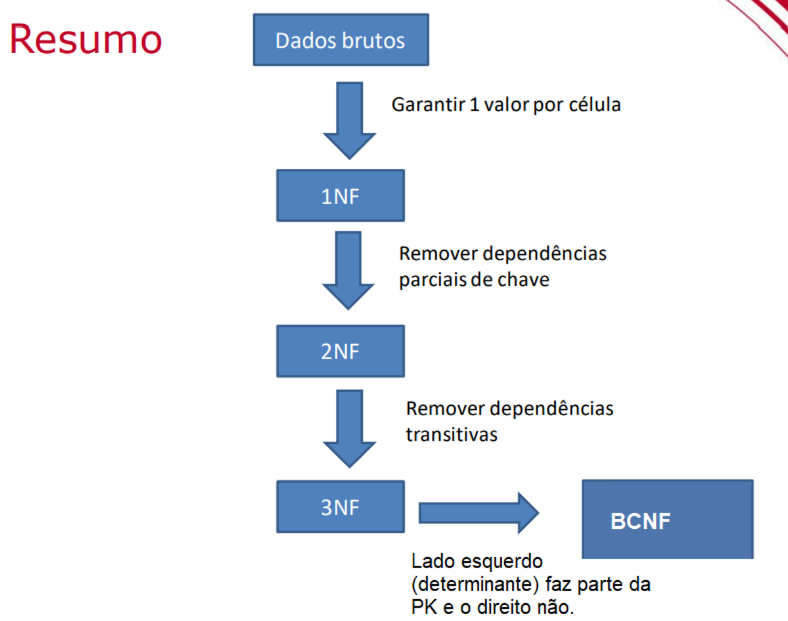

## Aula 18


### Transações

São operações em que ou são concluídas e todos os passos são executados, ou são canceladas e nada é feito. Ou seja, o objetivo é garantir a validade dos dados armazenados mesmo que ocorram: falhas de sistema, acessos concorrentes, erros de acesso, etc. A maneira mais fácil de pensar nisso é pensar em bancos, onde há operações como:
- Depósitos;
- Saques da conta - desde que tenham saldo;
- Criar empréstimos;
- Pagar um empréstimo;
- Aumentar um empréstimo já feito.

Par isso no mySQL temos na sessão um grupo de operações chamado de **transaction**.

**OBS**: Para as **transcations**, elas não são efetuadas diretamente no armazenamento permanente - exceto se o banco tiver auto-commit. 

Ou seja, quando uma conexão é estabelecida, uma sessão é aberta, e modificações são feitas na sessão, mas só serão transferidas para o banco de dados quando for feito um commit.

Para garantir que não estamos usamos auto-commit, basta ativar a **transaction**:
    
    db('START TRANSACTION')

### Atomicidade

Para garantir atomicidade podemos usar o **COMMIT** e o **ROLLBACK**.

Exemplo:
- se tentarmos inserir um emprestimo entre os usuarios 1 e 2 devemos ter sucesso,
- mas se tentarmos inserir um emprestimo entre os usuarios 1 e 1000 devemos ter uma falha. (no caso o usuário 1000 não existe).

Esses comandos são do tipo: TUDO OU NADA. Logo...: precisamos do `try` e `catch`:

``` python

try:
    db('START TRANSACTION')
    db('INSERT INTO emprestimo (id_credor, id_devedor) VALUES (1, 2)')
    db('INSERT INTO emprestimo (id_credor, id_devedor) VALUES (1, 1000)')
    db('COMMIT')
except Exception as e:
    print(e)
    db('ROLLBACK')

```

## Aula 19

Os objetivos da transação podem ser traduzidos na sigla ACID.

### ACID

- A - Atomicidade;
- C - Consistência;
- I - Isolamento;
- D - Durabilidade.

### Atomicidade

Garantir que um conjunto de comandos é executado ou rejeitado como uma única unidade é chamada atomicidade.

- Uma situação onde várias operações de banco de dados devem ser executadas atomicamente: atualização de estoque.

### Consistência

É a propriedade que indica que o banco de dados passa de um estado válido para outro estado válido a cada transação. É estabelecida através de **constraints e triggers**. Exemplo: **Constraints** de foreign key garantem que um campo de uma tabela (a chave estrangeira) aponta apenas para uma linha válida e única de outra tabela. **Triggers** ON DELETE e ON UPDATE indicam o que fazer quando essas operações ocorrem para que a base se mantenha consistente.

- ON DELETE pode ajudar a manter consistência em deletes físicos. Como você poderia garantir a consistência do banco de dados na presença de deletes lógicos? Basta criar uma coluna em uma tabela de disponibilidade, e toda vez que for feito o delete, ele será feito apenas de maneira lógica.

### Isolamento

É a propriedade relacionada à capacidade de executar várias transações concorrentes sem que um interfira diretamente na outra - basicamente o usuário tem a percepção de que as transações foram executadas sequencialmente.


### Durabilidade

É a propriedade que diz que quando uma transação é confirmada (COMMIT), ela vai permanecer gravada mesmo que a energia acaba ou o sistema trave - high availability.

Exemplo:
    
```Mysql

# Saldo inicial da conta 1 = 1000
# Saldo inicial da conta 2 era 500

# Transação 1:

START TRANSACTION
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
COMMIT
```

```Mysql

# Transação 2:

START TRANSACTION
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
COMMIT
```

**Situação 1: a transação 1 ocorre inteiramente antes da transação 2**

```Mysql

# Saldo inicial da conta 1 = 1000
# Saldo inicial da conta 2 era 500

# Transação 1:

1 START TRANSACTION
2 SELECT saldo INTO @s FROM contas WHERE id = 1  # s = 1000
3 UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1 # saldo_conta_1 = 1000 - 1000/2 = 500
4 UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2 # saldo_conta_2 = 500 + 1000/2 = 1000
5 COMMIT
```

```Mysql

# Transação 2:

6 START TRANSACTION
7 SELECT saldo INTO @s FROM contas WHERE id = 1  # s = 500
8 UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1 # saldo_conta_1 = 500 - 500/2 = 250
9 UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2 # saldo_conta_2 = 1000 + 225 = 1250
10 COMMIT
```

**Situação 2: as operações das duas transações ocorrem alternadamente**

```Mysql

# Saldo inicial da conta 1 = 1000
# Saldo inicial da conta 2 era 500

# Transação 1:

1 START TRANSACTION
3 SELECT saldo INTO @s FROM contas WHERE id = 1  # s = 1000
5 UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1 # saldo_conta_1 = 1000 - 1000/2 = 500
7 UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2 # saldo_conta_2 = 500 + 1000/2 = 1000
9 COMMIT
```

```Mysql

# Transação 2:

2 START TRANSACTION
4 SELECT saldo INTO @s FROM contas WHERE id = 1  # s = 1000
6 UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1 # saldo_conta_1 = 1000 - 1000/2 = 500
8 UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2 # saldo_conta_2 = 500 + 500 = 1000
10 COMMIT
```

TAM TAM TAMMMM: como não commitamos antes, continuou trabalhando sobre o valor incial mesmo depois de ter feito a transferência. Ou seja, fizemos dinheiro para a conta 1. Parece que precisamos de algo como um mutex, para travar em uma parte do código e só deixar ela acontecer depois de uma transação já ter acontecido.



**Solução:**
``` mysql
#Transação 1:
START TRANSACTION
LOCK contas
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
UNLOCK contas
COMMIT
```

``` mysql
#Transação 2: o mesmo
START TRANSACTION
LOCK contas
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
UNLOCK contas
COMMIT
```

**MAS CUIDADO** com o **dead-lock**: 

Travando os dois ao mesmo tempo nada anda.
Exemplo:


```
T1:                |   T2:
LOCK A - 1         |   LOCK B  - 2
LOCK B - 3         |   LOCK A  - 4
...                |   ...
UNLOCK B           |   UNLOCK A
UNLOCK A           |   UNLOCK B
```

Basicamente os dois ficam esperando um pelo outro para desbloquear os recursos A e B, mas a T2 não consegue liberar o recurso B até que pare de esperar pelo recurso A.

### Níveis de isolamento

O padrão ANSI/ISO SQL define 4 níveis de isolamento de transações:

- SERIALIZABLE;
- REPEATABLE READ;
- READ COMMITED;
- READ UNCOMMITED;

### SERIALIZABLE

Basicamente é o nível mais restritivo de isolamento. Uma transação que tente atualizar dados que não foram gravados de outra transação será rejeitada.

Se tudo for SERIALIZABLE você terá muita segurança e garantirá que ninguém mexa em algo até que esse seja finalizado, maaasss perde muita performance.

### REPEATABLE READ

Neste nível:
- se você leu algumas linhas
- e tenta ler elas de novo
- os mesmos valores erão retornados.

Porém, novas linhas podem ter isod adicionadas e serão retornadas também na segunda leitura: phantom read. Nível default de isolamento no engine default do MySQL (InnoDB).

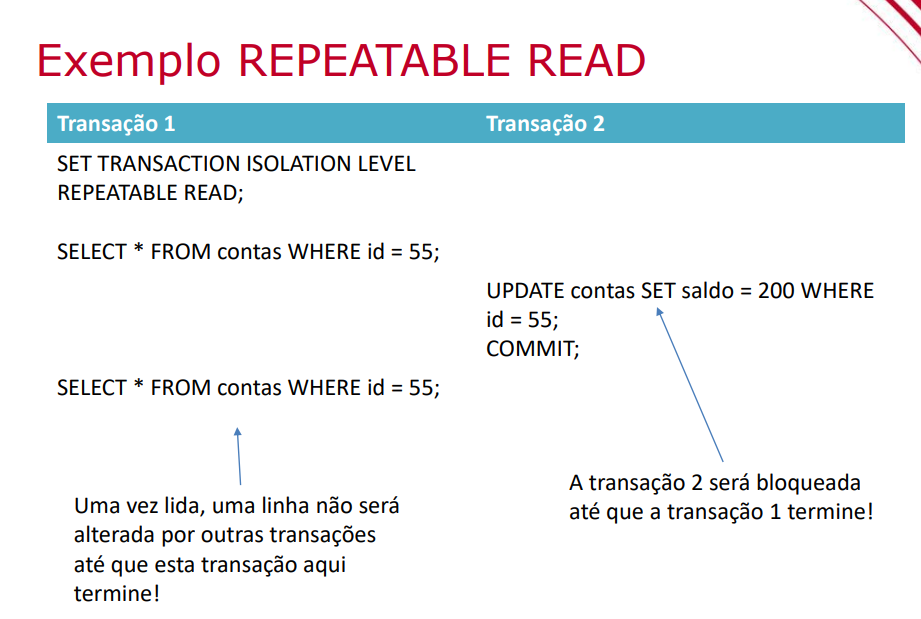

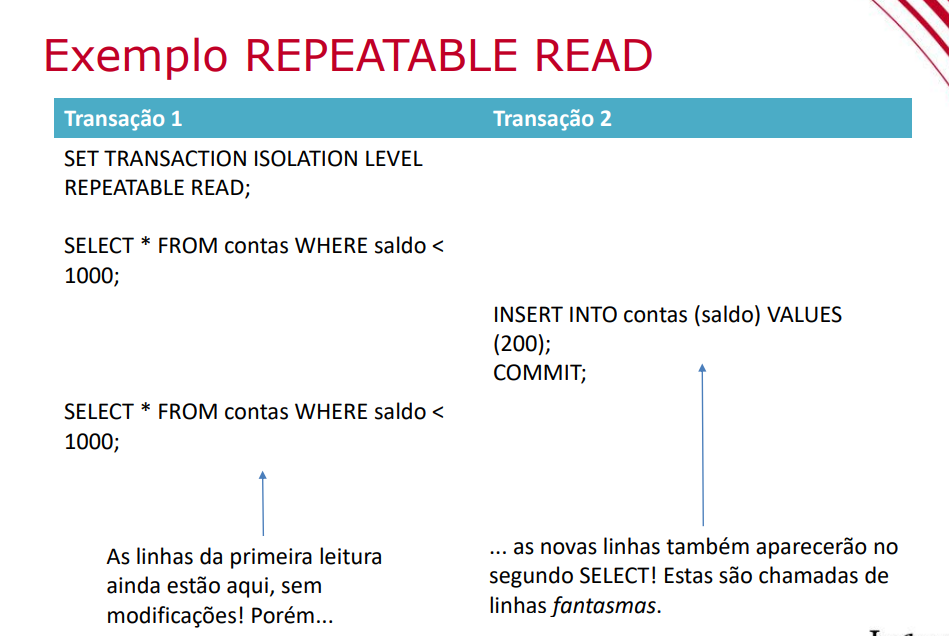

**SOLUÇÃO COM REPEATABLE READ**

``` mysql
#Transação 1:
START TRANSACTION
LOCK contas WHERE id = 1
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
LOCK contas WHERE id = 2
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
UNLOCK contas WHERE id = 2
UNLOCK contas WHERE id = 1
COMMIT
```

```mysql
#Transação 2: o mesmo
START TRANSACTION
LOCK contas WHERE id = 1
SELECT saldo INTO @s FROM contas WHERE id = 1
UPDATE contas SET saldo = saldo - @s/2 WHERE id = 1
LOCK contas WHERE id = 2
UPDATE contas SET saldo = saldo + @s/2 WHERE id = 2
UNLOCK contas WHERE id = 2
UNLOCK contas WHERE id = 1
COMMIT
```

### READ COMMITED

Neste nívek de isolamento:
- se uma transação ocorrer em paralelo com a nossa transação...
- e fizer o COMMIT de seus dados, ...
- então nossa transação pode acabar lendo dados de linha modificados.

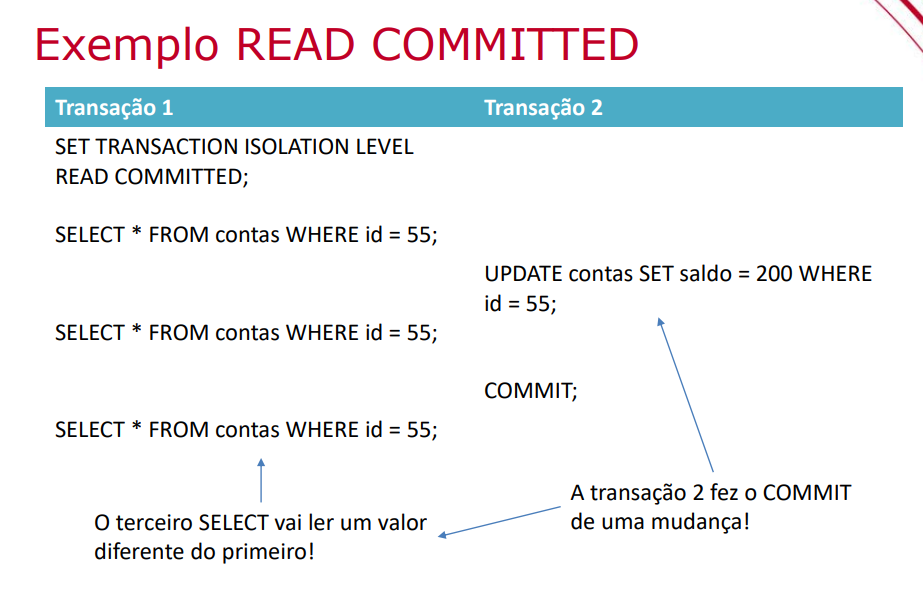

### READ UNCOMMITTED

Neste nível de isolamento:
- um dado modificado de uma transação não finalizada será acessível pela nossa transação (dirty read). É o nível mais perigoso, e raramente utilizado.

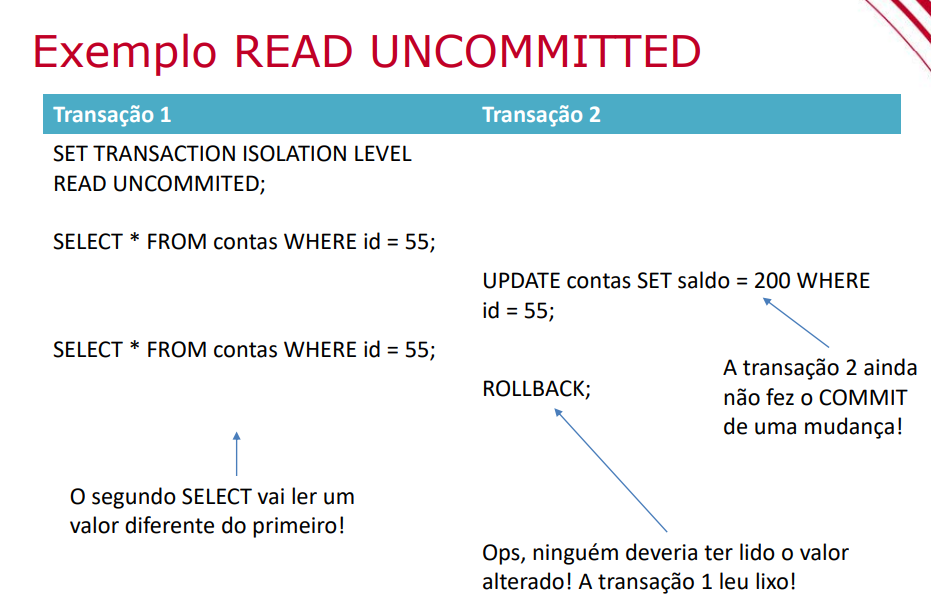

### COMPARAÇÃO

| Nível          | Dirty reads? | Non-repeatable reads? | Phantom reads? |   |
|----------------|--------------|-----------------------|----------------|---|
| SERIALIZABLE   | Não          | Não                   | Não            |   |
| REPETABLE READ | Não          | Não                   | Pode ocorrer   |   |
| READ COMMITED  | Não          | Pode ocorrer          | Pode ocorrer   |   |
| READ UNCOMMITED| Pode ocorrer | Pode ocorrer          | Pode ocorrer   |   |

Em relação aos notebooks de aula:
    
- Quando o nível era SERIALIZABLE, se em uma sessão eu tivesse inserido algo SEM COMMITAR e na outra fizesse select exatamente da tabela em que estava inserindo - ficava TRAVADO até o commit acontecer e se não acontecer dá TIMEOUT. Isso porque:

    O notebook A adquiriu a trava (lock) da tabela;
    
    O notebook B tentou adquirir essa trava para executar a query;
    
    Para evitar deadlock o MySQL implementou um mecanismo de timeout na espera pela aquisição da trava.
    
    EEE mesmo depois de voltar e COMMITAR no A - no outro notebook (B) rodou o que estava travado, mas como a transação não foi encerrada no B, se eu voltar pro A e tentar fazer SELECT, vai dar deadlock de novoo.
    
    PORTANTO:
    
    O nível SERIALIZABLE é muito restritivo, e pode causar deadlocks facilmente.


- Quando o nível era REPEATABLE READ, se eu tivesse inserido algo sem cOMMITAR em uma sessão e na outra tentasse inserir outra coisa, ele não travava, mas inseria apenas aquilo que havia sido inserido NA SESSÃO. 
    Basicamente:
    - Sessão A inseri algo. Retorna apenas o que inseri aqui.
    - Sessão B inseri algo. Retorna apenas o que inseri aqui.
    - Sessçao A fiz novo SELECT. Vai retornar a mesma coisa anterior na primeira leitura. Na segunda leitura vai ter phantom read SÓ NAO NO MYSQL VALEU AI IRMAO. O MySQL previne phantom reads: enquanto a transação não terminar, vale o mesmo resultado do SELECT. Isso é uma peculiaridade do MySQL, outros bancos de dados podem não ter a mesma natureza. Como tudo no mundo SQL, a padronização é sofrível...
    - No MYSQL só teremos phantom read se finalizarmos a sessão em A primeiro. Aí se abrirmos nova transação e fizermos SELECT vai estar lá o phantom read (que é aquilo que adicionamos na outra sessão sem ter commitado).

## Aula 20

### Stored procedures, triggers, views

- Stored procedures: procedimentos escritos em SQL, executados através da chamada CALL.
- Stored functions: funções escritas em SQL e que podem ser usadas nas mesmas situações que uma função pré-definida seria usada, como SUM() ou COUNT().
- Triggers: Um procedimento que será executado automaticamente quando determinadas condições ocorrem, como INSERT, UPDATE ou DELETE em uma tabela.
- Eventos: Procedimentos que podem ser executados pelo banco de dados em horários pré-definidos.
- Views: Diferente dos outros objetos, uma view é como um SELECT pré-definido, e resulta em uma tabela virtual.


### Stored Procedures - Procedimentos armazenados

Ao utilizar Stored Procedures, você pode ou tem como vantagens:
Além disso, você chama com o CALL

- Reusar o código - definir tarefas rotineiras e usá-las em vários workflows;
- Segurança - Ao invés de acessar as taabelas diretamente você pode limitar a pessoa a apenas acessar procedimentos.
- Desempenho - ao invés de sempre mandar comandos MySQL, você pode só chamar um procedimento que já foi armazenado. Além disso, não precisa compilar sempre, a compialação já fica em cache.

Desvantagens:

- Debugging pode ser mais difícil.
- Portabilidade :  a sintaxe de definição de stored procedures é raramente portável entre diferentes sistemas de gerenciamento de bancos de dados.
- Separação entre dados e lógica de negócios: com stored procedures estamos migrando parte da lógica de negócios para o banco de dados. Alterações na lógica agora demandam modificações (e manutenção) em partes distintas da sua aplicação, uma receita para dor de cabeça!
- Aumento da carga de processamento no servidor: servidores de banco de dados costumam ser otimizados para memória e largura de banda, não para processamento

### Stored functions

São funções no MYSQL, e para elas não se usa o CALL.


### Triggers e Constraints

São procedumentos armazenados que são executados automaticamente quando uma operação é realizada. Você pode escolher se o trigger ocorre antes ou depois da ação.

Constraints por sua vez são restrições que impedem que algo seja feito. Um exemplo são as foreign keys que impedem que algo seja deletado caso tenha uma foreign key constraint que não possui modo cascade.

Exemplo: trigger para atualizar automaticamente o saldo do usuário quando uma nova movimentação é inserida na tabela movimentacao. Constraint para impedir que um saldo negativo exista na nossa base de dados.

### Views

São como tabelas lógicas que são criadas através da aplicação de um comando SELECT. É como um SELECT pré-armazenado.

**Relembrando diferenças entre Views e Temporary Tables:**

A VIEW é quase como se fosse uma apelido para o SELECT, funcionando apenas com uma operação de consulta (read-only), mas sendo dinâmica - de tal forma que se os dados originais mudarem, a view também mudará. Além disso, o objeto da VIEW é permanente, então caso seja interessante combinar algumas informações e disponibilizar dados diltrados para os usuários sem perdê-los, a VIEW é ideal. Por sua vez, a TEMPORARY TABLE é como se fosse um snapshot dos dados, funcionando não apenas com uma operação de consulta mas também com operações de edição, inserção (read-write). Outrossim, a temporary table é estática, de tal forma que faz apenas uma cópia dos dados originais sendo uma tabela independente. Por fim, o objeto da temporary table é temporário, não permanecendo no disco após o fim da conexão com o banco de dados, sendo principalmente usada como um passo intermediário de consulta.

Basicamente:

| Views          | Temporary Tables |
|----------------|------------------|
| Muda tabela original   | Não muda tabela original              |
| Read-only |  Read-Write
| Dinâmica: muda se os dados mudam  | Estática: faz uma cópia dos dados originais             |
| Pense nela como SELECT|  Pense nela como uma tabela independente
| É um objeto permanente|  Não persiste no disco, desaparece ao fim da conexão |
| Uso: disponibilizar info filtrada para usuários| Uso: um passo intermediário de consulta     |


Porque usar views? Assim como no caso de stored procedures, podemos configurar permissões de acesso diferentes para esta view. Suponha que um vendedor deva ter acesso aos nomes dos clientes, mas não aos seus saldos (por razões de confidencialidade). Podemos conceder ao vendedor acesso apenas à essa view. Poderíamos ter resolvido o problema também com uma stored procedure: em SQL as coisas costumam ter várias soluções possíveis...

## Aula 22 

### Programação Funcional

### Cálculo Lambda

- Representa lógica, números, etc como funções
- Estuda mais como combinar funções do que como aplicá-las a dados concretos.

Essencial ao cálculo lambda são os seguintes
conceitos:

- Funções puras (pure functions)
    Não existe estado sendo modificado e armazenado, apenas valores sendo passados entre funções.
- Funções como objetos de primeiro classe (functions as first class objects)
    Assim como passamos valores podemos passar funções
- Funções de ordem superior (higher order functions)
    Funções podem receber funções e retornar funções
- Aplicação parcial de argumentos
- Loops representados como recursões
- Ausência de variáveis e atribuições - ausência de estado.
    
**O cálculo lambda NÃO é uma boa alternativa para implementação direta como linguagem de programação**, mas a adoção de alguns princípios pode ser vantajosa:

- Robustex;
- Claridade;
- Mais preocupada com "o que calcular" do que "como calcular"

A programação funcional é inspirada em:
- Cálculo lambda e teoria de categorias.


### Programação funcional

Linguagens de programação funcionais:
- Haskell, Lisp, etc

Linguagens exclusivamente imperativas, que não tem mecanismos nativos para programação funcional:
- C, Java (antes de Java 8), etc

Linguagens mistas, com mecanismos nativos para ajudar na programação funcional:
- Python, Scala, etc

Em todas estas linguagens, contudo, é possível adotar um estilo funcional de programação!

### Programação funcional e big data

- Programação funcional descreve o que queremos calcular sem especificar como iterar sobre os dados:
    - Facilmente paralelizável

- Programação funcional usa funções puras:
    - Robustez: se um bloco de cálculo falha (a máquina cai), podemos reiniciar o cálculo daquele bloco apenas, sem problemas

- Ausência de estado global:
    - Facilita o uso de memória distribuída.

Estas são características ideais para computação distribuída de grandes massas
de dados!

Os principais frameworks de computação big data são inspirados em programação funcional:
-  Hadoop MapReduce
- Spark

### Programação funcional em Python

-  Funções como objetos de primeira classe
-  Lambda
-  Closures e aplicação parcial de argumentos
-  List comprehensions
-  Algumas higher-order functions:
-  Map
-  Filter
-  Reduce


### Spark

Explique com suas palavras: porque o Spark é baseado em um paradigma de programação funcional?

Transformação de dados com muitos dados.

O Spark é uma ferramenta de ETL (extract, transform e load).

Nesse caso, informações relevantes são extraídas, essas informações são transformadas e depois são carregadas em um banco de dados. Como se fosse uma pipeline, ou de maneira mais geral, como se fosse um DAG (directed acyclic graph). 

Nesse caso temos uma fonte, vários processos e destinos. Dessa forma, podemos modelar por funções.
- Pode ser bem modelada por chamadas de função e fluxos de dados sem side effects (depende apenas da entrada dele, não mais de outras coisas). Além disso, itens de dados são independentes

E por que é vantajoso adotar o resto o paradigma funcional? Como isso influencia na implementação?

- Pode implementar com funções sem side effect (chamada de função que altera o estado global sendo que a função depende - se chamar 2 vezes, os resultados serão diferentes - não é paralelizável e nem cacheavel). 
- Itens independentes - posso processar em qualquer ordem - são processáveis em paralelo, isto implica que programação funcional é uma boa ideia, pois possui:
        - Paralelismo: uma chamada de funçã não depende de outra, um item processado não afeta outro item.
        - Usar múltiplos processadores separados (diferença entre máquinas multi core e em cluster). No caso temos o cluster- sem compartilhar o estado global.
        - Robustez: se uma unidade de processamento é perdida, podemos apenas recomputar o que foi perdido - ou seja, se o processador cai, recomputa apenas o necessário.
        - Na programação funcional, podemos passar funções e receber funções. O argumento de entrada do 'map' é uma função. Ou seja, funções como objetos de primeira classe.
        

**O RESUMO** : programação funcional implica em : 
    - Sem efeitos colaterais.
    - Sem estado global.
    - Funções como objeto de primeira classe, permitindo enviar código para uma função.
        
E isso facilita paralelismo porque também facilita dados independentese migração de código.



## Aula 24

### Armazenamento

- Localidade: tendência das aplicações de acessar dados em sequência, ou seja, a informação geralmente é acessada em conjunto com seus vizinhos.
    Solução: pre-fetching (puxa 1, puxa muitos)
- Reuso: uma informação acessada pode ser requerida de novo em curto prazo.
    Solução: caching
    
Puxar do HD sempre é custoso e puxar da RAM também é valioso. E esse custo a gente quebra em 2:
Pense na situaçãp viagem entre SP e Campinas para transportar móveis.
- Latência: tempo necessário entre o envio e a chegada do 1 byte em um pacote de dados. No contexto acima seria o tempo da viagem, ir até lá e buscar.
- Throughput: taxa média de transferência de dados descontando a latência. No contexto da acima seria descarregar os móveis e transferí-los.

Solução para latência: prefetching. 
Solução para latência + throughput: caching.

Para puxar dados da CPU para a RAM há grande latência para ler o primeiro byte e a velocidade de transferência de dados é moderada (thoughput).

- Hierarquia da memória

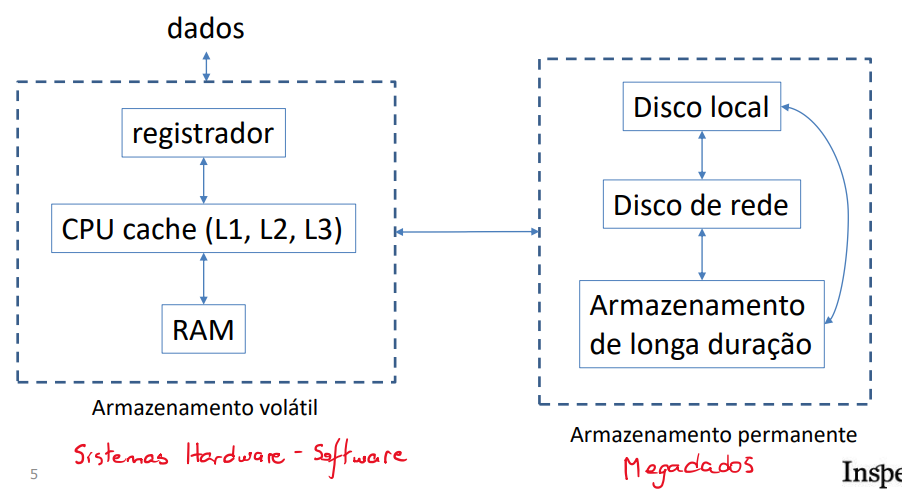



### Discos e caracerísticas

| Disco local|-----|
|----------------|--------------|
|Uso             | Sistema operacional, arquivos locais, cache de dados de rede          | 
| Exemplo        | HD, SSD, CD, USB drive (NVMe)                                         |
| Tamanho        | Baixo - alguns TB                                                     |
| Latência       | baixa                                                                 |
| Trhoughput     | alto                                                                  |
| Custo          | alto                                                                  |


| Array de discos locais|-----|
|----------------|--------------|
|Uso             | Multimedia, alto desempenho, alta confiabilidade          | 
| Exemplo        | RAID                                       |
| Tamanho        | Médio - centenas de TB                                                     |
| Latência       | baixa                                                                 |
| Trhoughput     | alto                                                                  |
| Custo          | alto                                                                  |


|Network File System|-----|
|----------------|--------------|
|Uso             | Informações compartilhadas em rede local          | 
| Exemplo        | NFS, Amazon EFS                                       |
| Tamanho        | medio-alto / centenas de TB exceto serviços elásticos como AWS EFS – pode escalar monstro) |                 
| Latência       | média                                                                 
| Trhoughput     | médio                                                                  |
| Custo          | médio-alto                                                                  |

|Armazenamento em nuvem|Dados quentes|
|----------------|--------------|
|Uso             | Informações compartilhadas em nuvem          | 
| Exemplo        | Amazon S3                                       |
| Tamanho        | Monstro - de vários petabytes a exabytes!  |                 
| Latência       | Depende : alta para fora do datacenter, média-baixa dentro do datacenter      |                             
| Trhoughput     | Depende : alto centro do datacenter, média-baixa para fora do datacenter  |
| Custo          | médio-baixo                                                                  |

|Armazenamento de longa duração - vaults|Dados frios|
|----------------|--------------|
|Uso             | Backup gigante          | 
| Exemplo        | Amazon Glacier                                      |
| Tamanho        | Monstro - de vários petabytes a exabytes!  |                 
| Latência       | Altíssima - de minutos a horas   {restauração de backup}   |                             
| Trhoughput     | N/A - uso offline {restauração de backup} |
| Custo          | baixo                                                                  |

#### RAID

- Redundant Array of Independent Disks
    Vários discos físicos combinados em um único disco lógico
- Várias configurações diferentes possíveis.
- Objetivos: aumentar a performance e confiabilidade

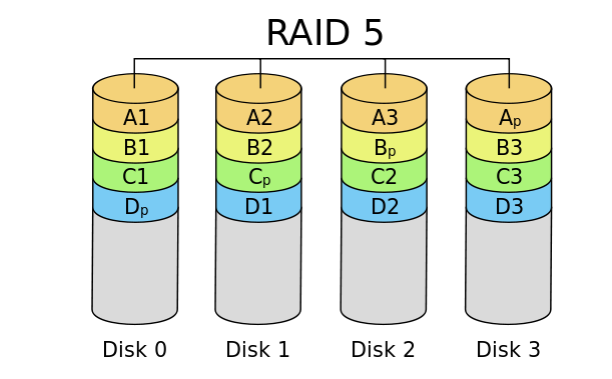

### Cálculo para saber qual disco foi queimado:

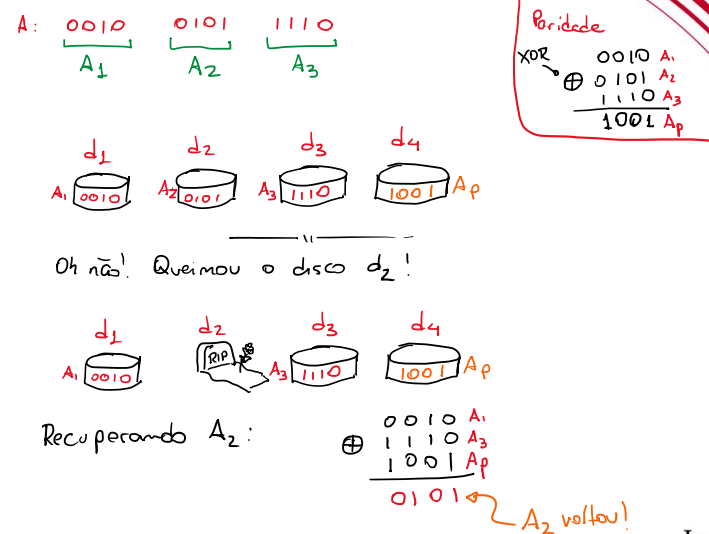

### Hadoop Distributed File System (HDFS)

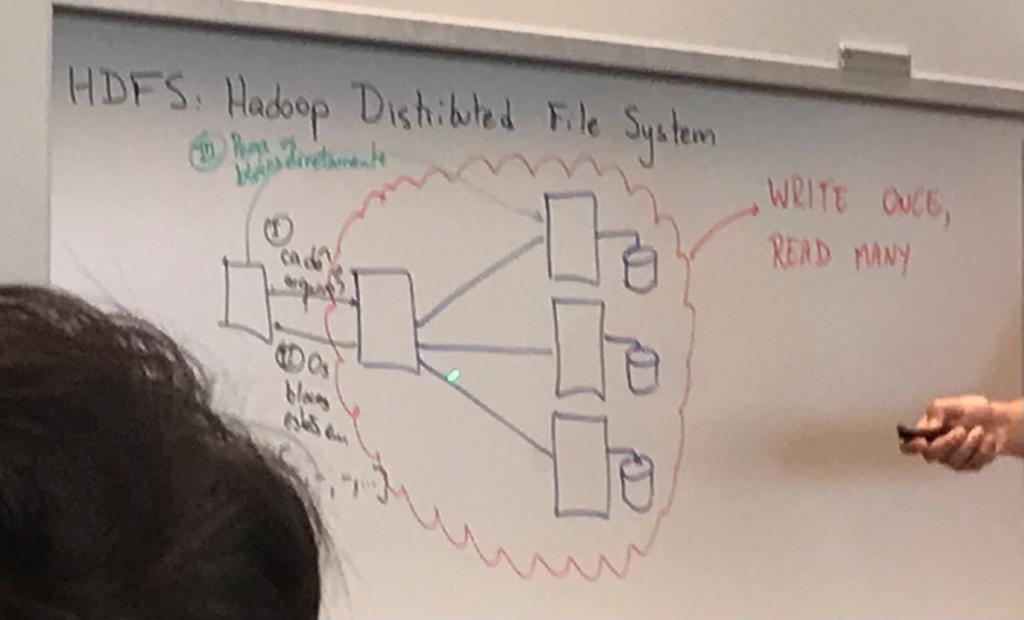


Está escrito nessa ordem de cima para baixo:

III - Pega os blocos diretamente;
I - Cadê o arquivo?
II - Os blocos estão em [-,-,-,-,...]

### Network File System (NFS)

- Permite que arquivos armazenados remotamente sejam acessados como se fossem arquivos locais.
- Desenvolvido originalmente pela Sun Microsystems que são os mesmos autores do Java e que foi vendida para a Oracle em 2010

### Server Message Block (SMB)

- Outro sistema de arquivos de rede, geralmente associado a sistemas Windows.
- Conhecido no mundo Lunix como Samba, a implementação open-source do SMB.

### AWS EBS

- Amazon Web Services: Elastic Block Storage.
- Um disco virtual, não formatado, para uso na AWS Elastic Compute Cloud (EC2)
- Pode ser "mounted" nas instâncias EC2

### AWS EFS

- AWS Elastic File System
- O NFS da Amazon, com elasticidade
- Pode ser "mounted" nas instâncias EC2

### AWS S3

- AWS Simple Storage Service
- Sistema de armazenamento em nuvem
- Acesso via API
- Read-ONLY : write-once, read-many

### AWS Glacier

- Sistema de armazenamento de longa duração
- Voltado para backups, armazenamento por demandas regulatórias, etc.
- Acesso via API

## EXERCÍCIOS DE ARMAZENAMENTO

### 1)

Em um cluster temos vários arquivos enormes, de **tamanho médio 1 GB**. Todos os arquivos são do tipo **write-once-read-many**: uma vez que o arquivo é criado, ele pode apenas ser removido por completo, nunca modificado parcialmente. Esse é o modo de operação do S3 da AWS.

Os arquivos são divididos em **blocos de 64 MB** e estão armazenados **de modo redundante**, com **fator de replicação 3** (este é o modo padrão do HDFS). Ou seja, **cada bloco é armazenado 3 vezes**, em máquinas diferentes.

Desejamos armazenar **10000 arquivos destes**, em máquinas com **4 discos de 1TB SSD** cada, nas quais queremos que os dados ocupem no máximo **75% do espaço**.

Toda semana parte dos arquivos será processada usando Spark para alguma atividade de extração de informação. 

**a) (0,5 pts)** Quais as vantagens e desvantagens da replicação em máquinas diferentes, neste contexto?

Como vantagens podemos pensar que em sistemas redundantes, caso alguma máquina pare de funcionar, sempre haverá outra máquina que executa a mesma tarefa e mantém o sistema, ou seja, há maior confiabilidade. Além de que o fluxo de trabalho pode ser dividido nessas máquinas, isto é, é possível acessar paralelamente os dados - oq ue melhora o desempenho.

Entretanto, como desvantagens temos que isso é custoso - tanto em relação ao equipamento, quanto em relação à operação, já que é necessário adquirir mais máquinas e arcar com a manutenção delas.

**b) (0,5 pts)** Porque write-once-read-many é desejável aqui?

Porque as atividades são típicas de bigdata e envolvem extrair informação, requerendo apebas a leitura dos dados brutos, dessa forma, não há necessidade de ter a função de escrever diversas vezes. Até porque isso aumenta o risco de inconsistência de informações, já que uma pessoa poderia modificar os dados em uma máquina, e não alterar esses mesmos dados na outra que também está armazenanando a mesma informação, ou ainda, por conta de diversos acessos concorrentes haveria a necessidade de utilizar mutex. Logo, esse modelo nesse contexto facilita a replicação de dados para desempenho e confiabilidade.

**c) (0,5 pts)** Quantas máquinas este cluster deve ter, no mínimo, para
acomodar esses dados?

1- Quantos dados preciso acomodar?

- Em média 1 arquivo possui 1 Gb.
- Esse arquivo é armazenado 3 vezes em máquinas diferentes.
- Queremos 10000 arquivos desses.

Logo, no total queremos acomodar: 1 Gb * 10.000 * 3 = 30.000 Gb / 30 Tb (1 Gb = 10^9 Bytes e 1Tb = 10^12 Bytes| 1000 Gb = 1 Tb)

2 - Qual a minha disponibilidade?

- Máquinas com 4 discos de 1 Tb
- Só podem ocupar no máximo 75% do espaço (pensei nisso por máquina).

1 máquina possui = 0,75(1Tb * 4) = 3 Tb

E temos 30 Tb. Logo precisamos de 30/3 de 10 máquinas.


- Solução do prof dessa parte final:

30 - 0.75(75%)       30/0.75 = 40
x  - 1(100%)

Ele pensou assim : temos que fazer com que 30 ocupe no máximo 0.75, logo precisamos ter o 100% que é isso mais a sobra de espaço.

Com isso, basta depois dividir esse total por 4Tb por máquina:

40/4 = 10 máquinas.

**d) (0,5 pts)** Mais dados chegam constantemente ao sistema, que
eventualmente ficará sem capacidade! Mas uma vez que a pipeline Spark é
executada, os dados não são mais necessários de imediato. Proponha uma
solução simples para não perder dados e não ter que aumentar
indefinidamente o cluster. 

Como ao utilizar o Spark os dados não são mais necessários de **imediato**, para não perder esses dados e não ter que aumentar o cluster basta fazermos um backup de dados. Dessa forma, quando precisar eles estarão ali, sendo que a velocidade de transferência não existe já que o uso é offline e o custo disso é baixíssimo, além de permitir guardar uma grande quantidade de dados. 

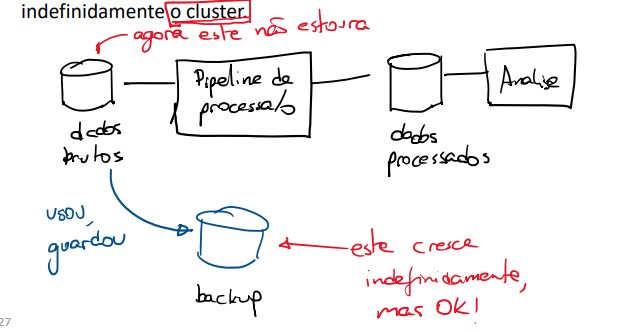

### 2)

(1 pt) Descreva um sistema de armazenamento adequado para edição de vídeo, onde temos grandes massas de dados e a necessidade de transferi-los em alta velocidade numa rede local.

-  Estime capacidade e velocidade de transferência para editar vídeos full HD (1920x1080, 30 quadros por segundo, 24-bit RGB) com taxa de compressão típica de 30% (ou seja, o tamanho comprimido é 30% do tamanho original).
- Cite tecnologias adequadas para este sistema. 

Primeiro vamos estimar a capacidade e velocidade de transferência. Temos que processar vídeos de:
- 1920x1080 pixels/quadro;
- 30 quadro/segundo
- 24 bits/pixel
- taxa de compressão = 30% do original

1920 * 1080  pixel/quadro * 30 quadro/segundo * 24 bits/pixel * 0,3 (compressao) = 447.897.600 bits/segundo (divide por 8) ou 

55.987.200 bytes/s ouuuu 0,0559872 Gb/s

Supondo que temos que processar 1000 h de vídeo, teremos um total de:

0,0559872 Gb/s * 3600 s * 1000 = 201.553,92 Gb em 1000 horas ouuu 201,55 Tb.


Agora, vamos aos dados do problema - precisamos processar **grandes massas - centenas de Tb** de dados e a velocidade de transferência (**throughput) precisa ser alta em rede local**.

Logo a melhor solução para o problema seria utilizar o array de disco local - RAID 5, ou o Gigabit Ethernet - que também seria mais que o suficiente.

Sendo que o Gigabit Ethernet (GbE ou 1 GigE) é o termo que descreve várias tecnologias para transmissão de quadros em uma rede na velocidade de 1 Gigabit por segundo (Gigabit/s), definido no padrão IEEE 802.3-2005. É possível encontrar redes Gigabit Ethernet no mercado usando concentrador (HUB), mas pela norma a rede só pode ser usada através de comutador (switch).





### 3)

**(1 pt)** A rede social está fazendo um sucesso inacreditável! Estima-se que daqui a **6 meses** a rede terá **2 milhões de usuários**, cada um postando uma média de **10kB por dia de conteúdo** (fotos, áudio, texto, etc). Pelas regras
desta rede social, **todo o material postado nos últimos 12 meses estará rapidamente acessível**, (em questão de milissegundos). A empresa **deseja manter registros históricos de todo o material mais antigo (após 12 meses)**, indefinidamente. Projete uma solução de armazenamento para a empresa, indicando o tamanho esperado do(s) espaço(s) de armazenamento. 

2.000.000 (usuários) * 10.000 Bytes/dia * 30 dias/ mes * 12 meses = 7200 Gb em 1 ano ou 7,2 Tb.

Para ter todo esse material em ml disponível, a latência precisa ser baixa.

Logo podemos ter um sistema com array de discos - RAID 5 - que possui baixa latência, embora o thourghput seja alto. Mas isso não há longo prazo, já que só aguenta centenas de TB. Mas ao mesmo tempo poderíamos ter um sistema de backup .



